In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

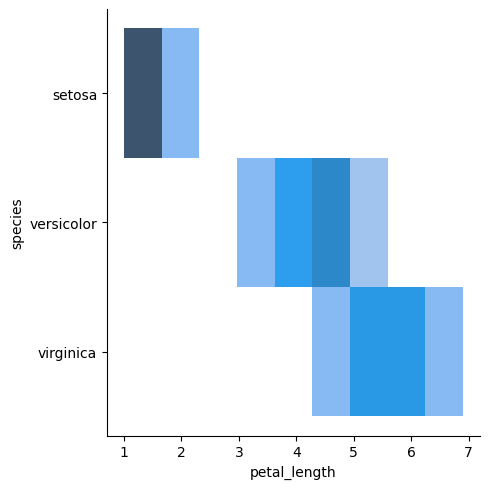

In [3]:
iris = sns.load_dataset('iris')
sns.displot(x='petal_length', y= 'species',data = iris)
# The petal length is pretty evenly distibuted in terms of species

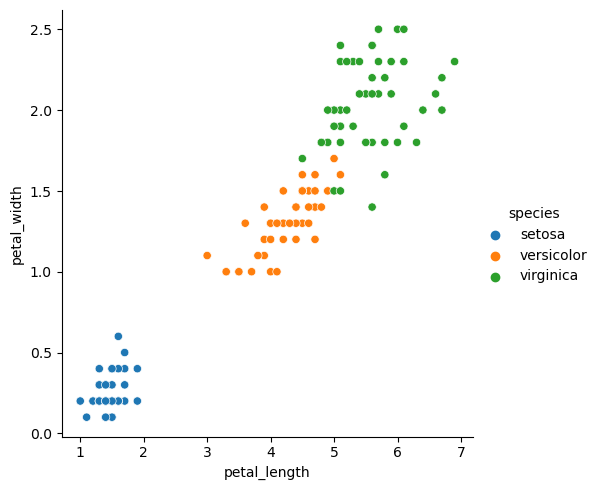

In [4]:
sns.relplot(x='petal_length', y='petal_width', hue='species', data = iris)
# there is a rough correlation between petal length and petal width in terms of species

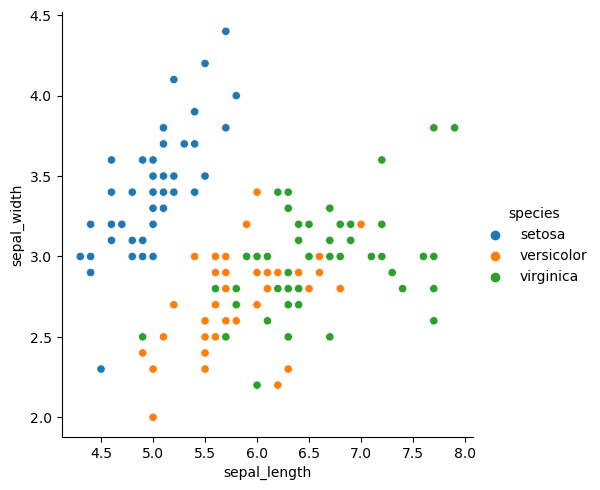

In [5]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species',data = iris)
# I do not think it would be reasonable to use sepal width/length to determine a species.

In [ ]:
# Using petal length and width would be the best course of action to predict species in my opinion.

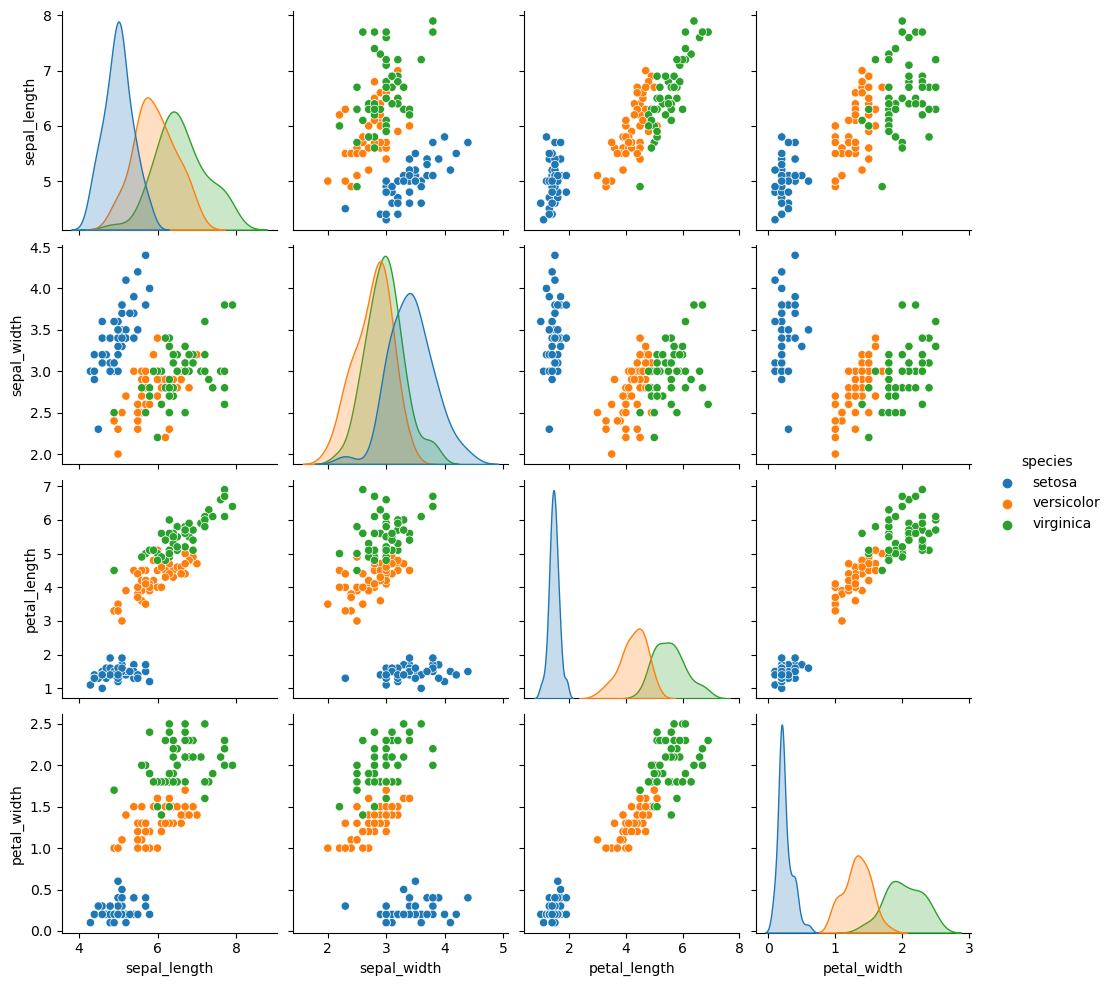

In [7]:
sns.pairplot(data = iris, hue = 'species')

In [9]:
df = sns.load_dataset('anscombe')
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

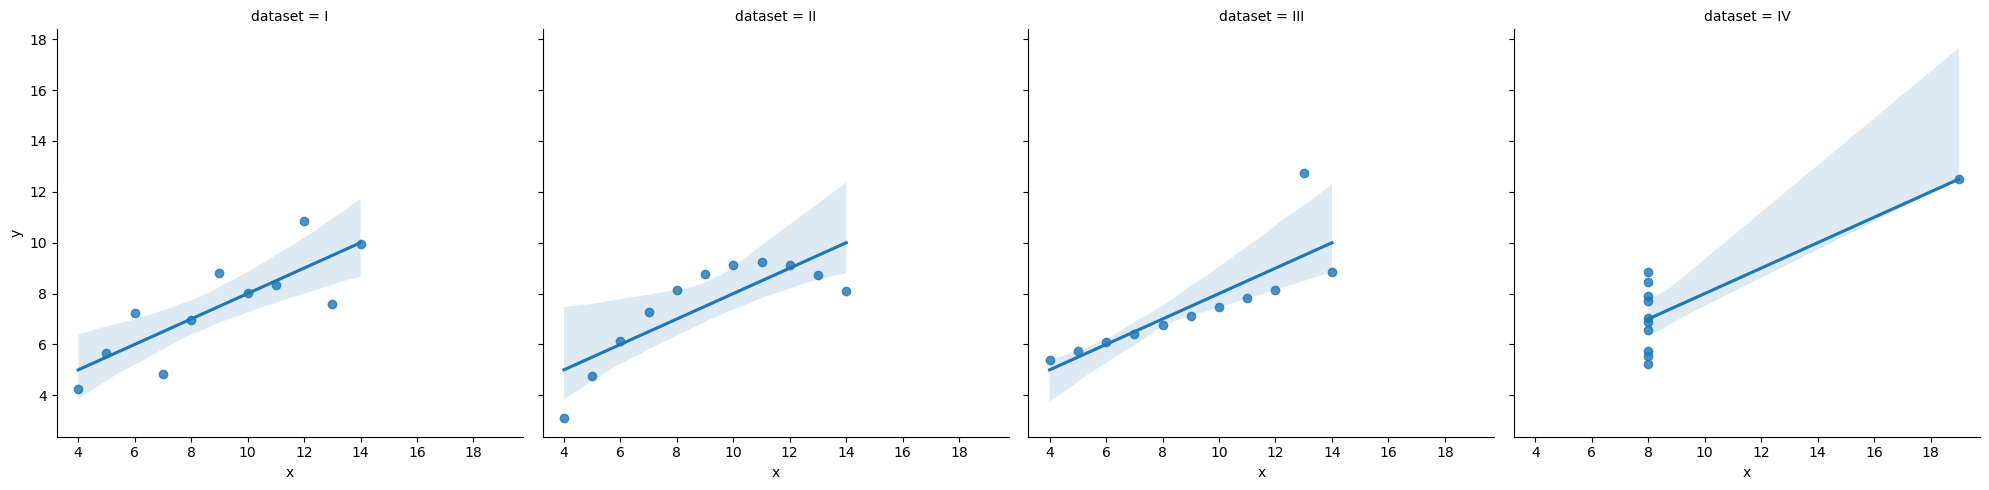

In [10]:
sns.lmplot(data = df, x = 'x', y = 'y', col = 'dataset')

In [ ]:
# Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [12]:
InsectSprays = data('InsectSprays')
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

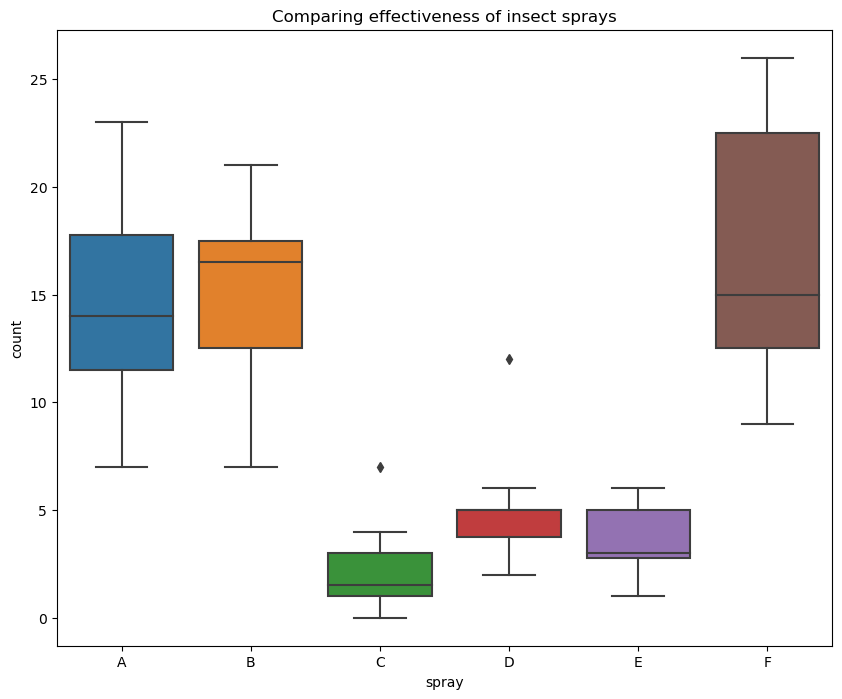

In [14]:
plt.figure(figsize=(10, 8))
sns.boxplot(y = 'count', data = InsectSprays, x = 'spray')
plt.title('Comparing effectiveness of insect sprays')
plt.show()

In [ ]:
# Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [15]:
swiss = data('swiss')
swiss['is_catholic'] = swiss.Catholic > 50

In [ ]:
# Does whether or not a province is Catholic influence fertility?

In [ ]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

In [ ]:
# What measure correlates most strongly with fertility?

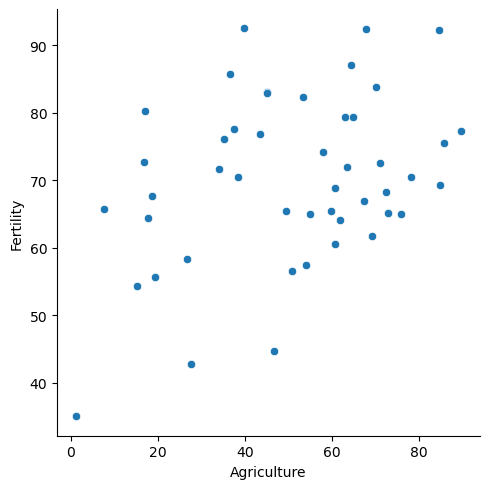

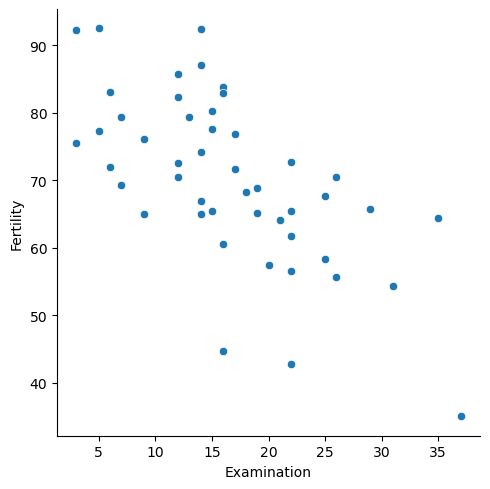

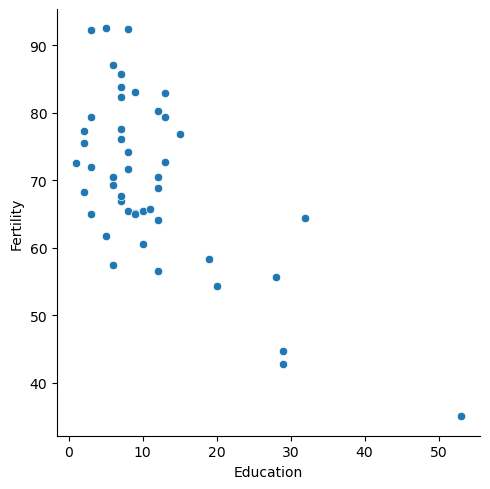

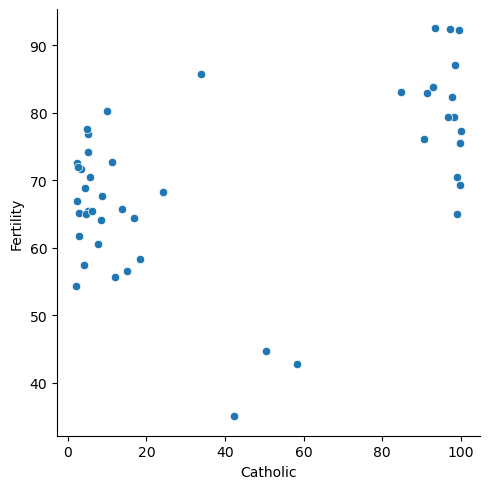

In [16]:
for col in swiss.columns[1:-1]:
     sns.relplot(data = swiss, y = 'Fertility', x = col)

In [ ]:
# Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each

In [17]:
def get_db_url(db):
    from env import username, password, host
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [18]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [ ]:
# Convert the item_price column into a float

In [ ]:
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')

In [22]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [ ]:
# check if item price is total price or per item

In [23]:
chicken_bowl = orders[orders.item_name == 'Chicken Bowl']
chicken_bowl.sort_values('quantity', ascending = False)

,id,order_id,quantity,item_name,choice_description,item_price
409,410,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn ...",$32.94
1514,1515,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",$26.25
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
4435,4436,1767,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Lettuce]]",$17.50
415,416,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],$17.50
...,...,...,...,...,...,...
1839,1840,745,1,Chicken Bowl,"[[Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot), Fresh Tomato Sal...",$8.49
1848,1849,749,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Beans, Sour Cream, Cheese]]",$8.75
1851,1852,750,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour Cream, Lettuce]]",$8.75
1852,1853,751,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice]]",$8.75


In [24]:
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [25]:
best_sellers.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [ ]:
# revenue produced by 4 highest selling items.

In [26]:
revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           $16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 $8.75 $8.75 $8.75 $11.25 $11.25 $11.25 $...
Chicken Burrito        $8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $10.98 $8.75 $8.75 $8.75 $8.75 $8.49 $8.4...
Chips and Guacamole    $4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.99 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $4...
Steak Burrito          $11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $9.25 ...
Name: item_price, dtype: object

In [27]:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Burrito,$8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $10.98 $8.75 $8.75 $8.75 $8.75 $8.49 $8.4...
1,Chips and Guacamole,$4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.99 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $4...
2,Chicken Bowl,$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 $8.75 $8.75 $8.75 $11.25 $11.25 $11.25 $...
3,Steak Burrito,$11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $9.25 ...


In [ ]:
# Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [29]:
sleepstudy = data('sleepstudy')
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str) 
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


<Axes: xlabel='Days', ylabel='Reaction'>

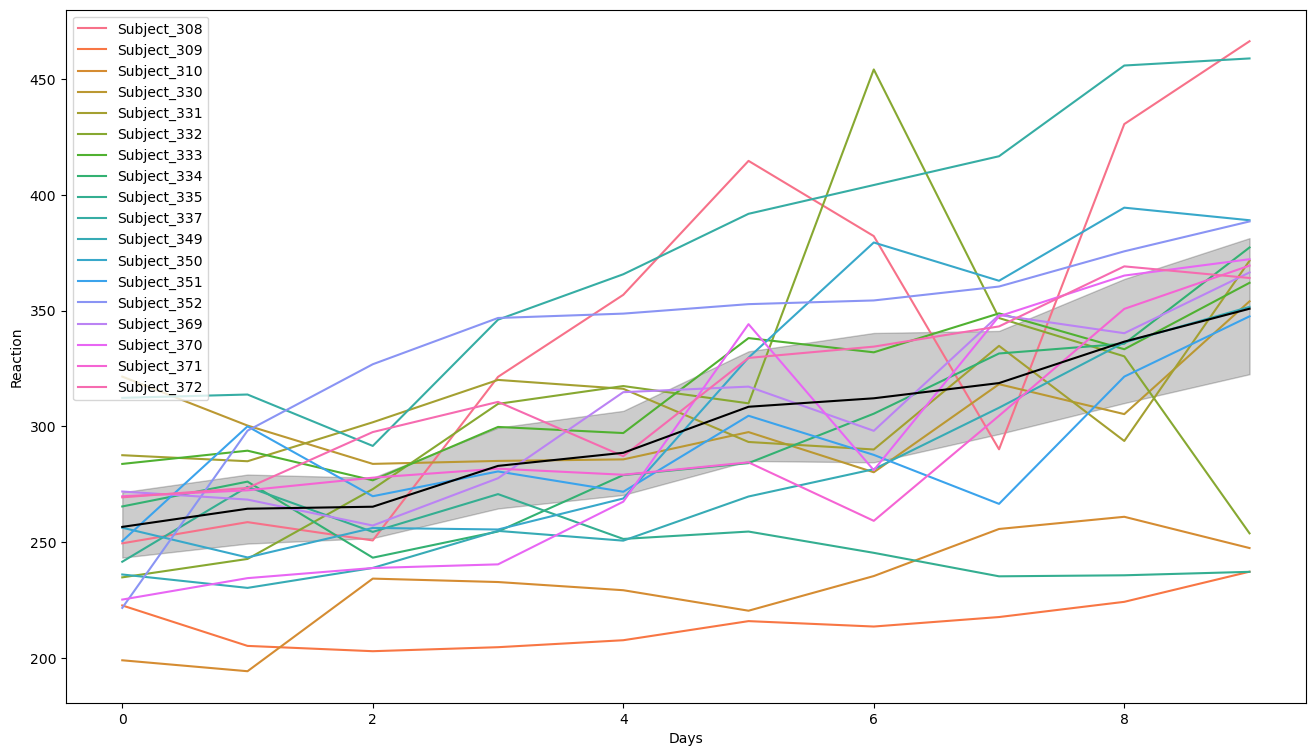

In [30]:
plt.figure(figsize=(16, 9))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction',  hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', estimator = 'mean')